In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from operator import itemgetter

In [2]:
%matplotlib inline

## Read and clean data

In [3]:
views = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
# views

In [4]:
q_975 = views.value.quantile(0.975)
q_975

177613.075

In [5]:
q_025 = views.value.quantile(0.025)
q_025

17876.4

In [6]:
filt_outstanding = (views.value <= q_975) & (views.value >= q_025)

In [7]:
views_cleaned = views.loc[filt_outstanding, :].copy()
views_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## Line Plot


In [8]:
def draw_line_plot(dataset):

    fig = plt.figure(figsize=(16, 8))
    
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    x = dataset.index
    y = dataset.value

    plt.plot(x, y)
    fig.savefig('line_plot.png')

    return fig

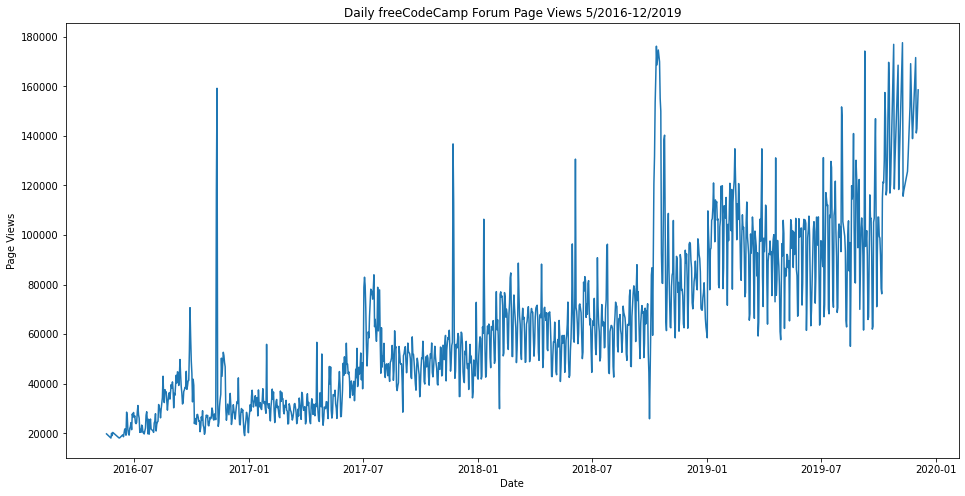

In [9]:
line_plot_views_cleaned = draw_line_plot(views_cleaned)

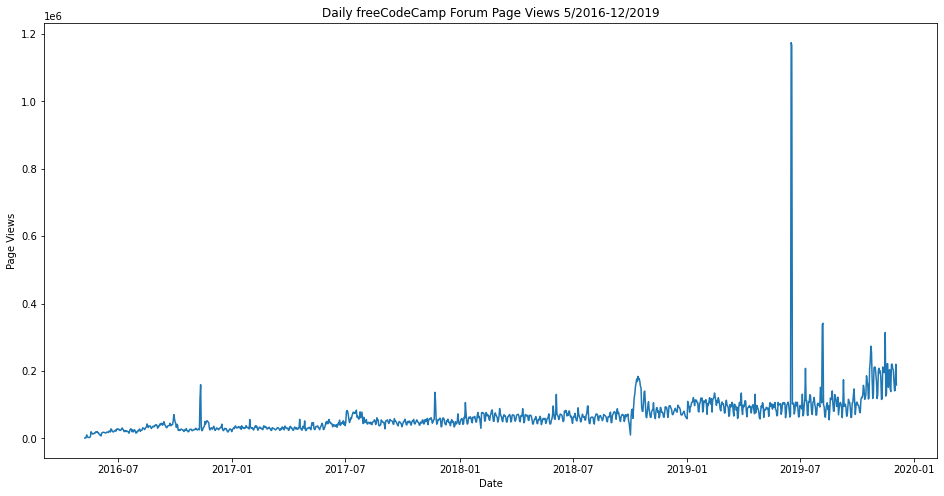

In [10]:
line_plot_views = draw_line_plot(views)

## Bar Plot

In [11]:
# def draw_bar_plot():
def draw_bar_plot(dataset):
    
    # df_bar = df.copy()
    df_bar = dataset.copy()
#     df_bar = views_cleaned.copy()
   
    # add year
    df_bar['year'] = df_bar.index.year
    df_bar.year.value_counts().sort_index()

    # add month name
    df_bar['month'] = df_bar.index.month_name()
    df_bar.month.value_counts(normalize=True).mul(100).round(1)

    # add month index
    df_bar['month_index'] = df_bar.index.month

    # get sorted months
    month_gr = df_bar.groupby('month')
    months_indexes = month_gr.nth(0)
    months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
    month_tuples = list(months_indexes.combo)
    months_ordered = sorted(month_tuples, key=lambda x: x[1])
    months_ordered = [month for month, index in months_ordered]
    # months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
    #                   'July', 'August', 'September', 'October', 'November', 'December']

    # define month as categorical data; Specify logical ordering of the category (ordered categories)
    month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)
    df_bar['month'] = df_bar.month.astype(month_type)

    # data for bar plot
    # todo: make pivot_table instead of this lines
    df_bar.drop(columns='month_index', inplace=True)
    df_bar_gr = df_bar.groupby(['year', 'month'])
    mean = df_bar_gr.mean().sort_index()
    data_for_plot = mean.unstack()
    data_for_plot.columns = months_ordered

    # Draw bar plot
    ax = data_for_plot.plot(kind='bar', 
                            figsize=(16, 8), 
                            xlabel='Years', 
                            ylabel='Average Page Views', 
                            legend=True)
    ax.legend(title='Months')
    fig = ax.get_figure()

    # save image
    fig.savefig('bar_plot.png', dpi=300, transparent=False)
    
    # todo: issue with saving figure
    
    return fig

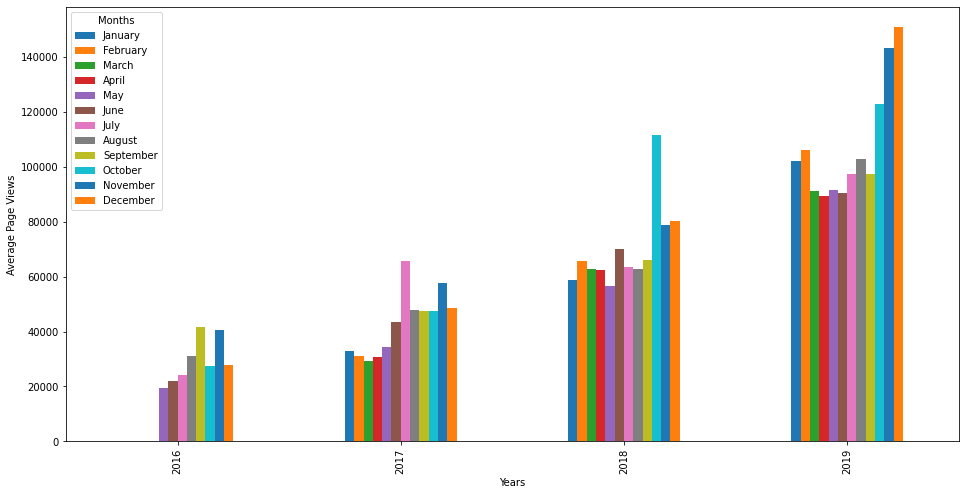

In [12]:
bar_plot_cleaned = draw_bar_plot(views_cleaned)

## Box Plot

In [13]:
# def draw_box_plot():
def draw_box_plot(dataset):

    # df_box = views_cleaned.copy()
    df_box = dataset.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    df_box.rename({'month': 'Month',
                   'year': 'Year',
                   'value': 'Page Views',
                   'date': 'Date'}, axis=1, inplace=True)

    # Set month as category and give it order
    months_abbr = df_box.Month.unique()
    # print(months_abbr)
    months_abbr_sorted = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months_abbr_type = pd.api.types.CategoricalDtype(categories=months_abbr_sorted, ordered=True)
    df_box['Month'] = df_box.Month.astype(months_abbr_type)

#     fig = plt.figure(figsize=(10.0, 5.0))
    fig = plt.figure(figsize=(12.0, 6.0))

    axes_1 = fig.add_axes([0, 0, 0.5, 1])
    axes_1.set_title('Year-wise Box Plot (Trend)')
    # axes_1.set_xlabel('Year')
    # axes_1.set_ylabel('Page Views')
    sns.boxplot(x='Year', y='Page Views', data=df_box)

    axes_2 = fig.add_axes([0.6, 0.0,
                           0.5, 1])
    axes_2.set_title('Month-wise Box Plot (Seasonality)')
    # axes_2.set_xlabel('Month')
    # axes_2.set_ylabel('Page Views')
    sns.boxplot(x='Month', y='Page Views', data=df_box)

    # Save image
    fig.savefig('box_plot.png')

    return fig


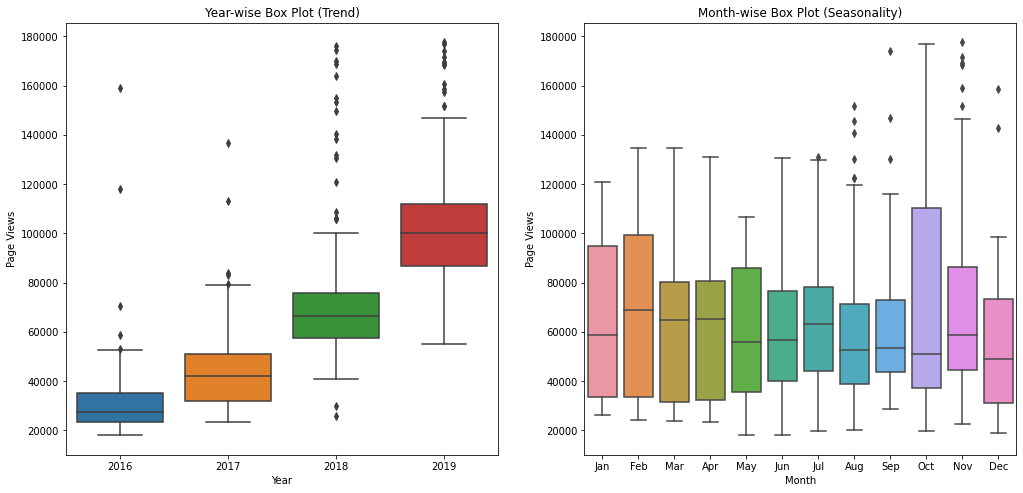

In [14]:
box_plot_cleaned = draw_box_plot(views_cleaned)

## Conclusions

Given dataset represents number of visitors of 'freecodecamp.org' site  
per day in time period from 09.05.2016 up to 03.12.2019.  

In 2016 there's no data for four first months and up to ninth of May.  
For December 2019 data set contains only for three first days.  




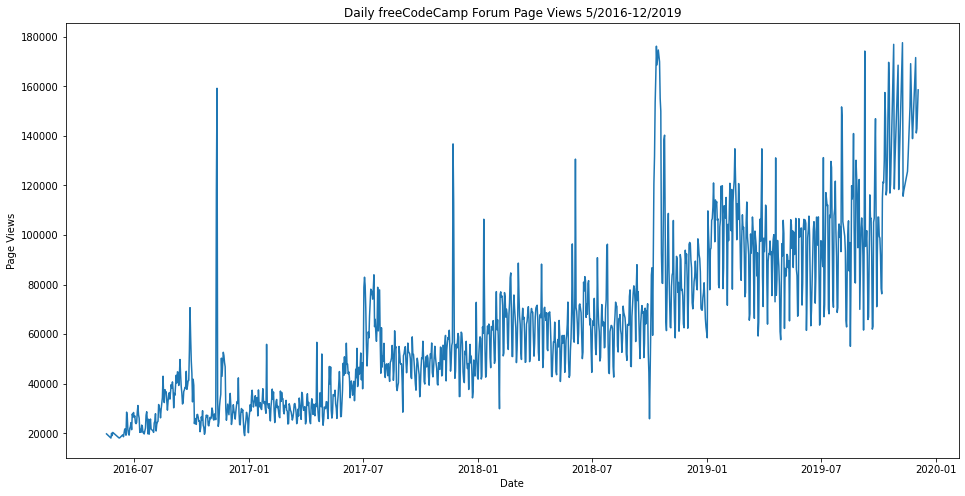

In [15]:
line_plot_views_cleaned

### Analyzing Line Plot

On the line plot we can see the growth of popularity.  

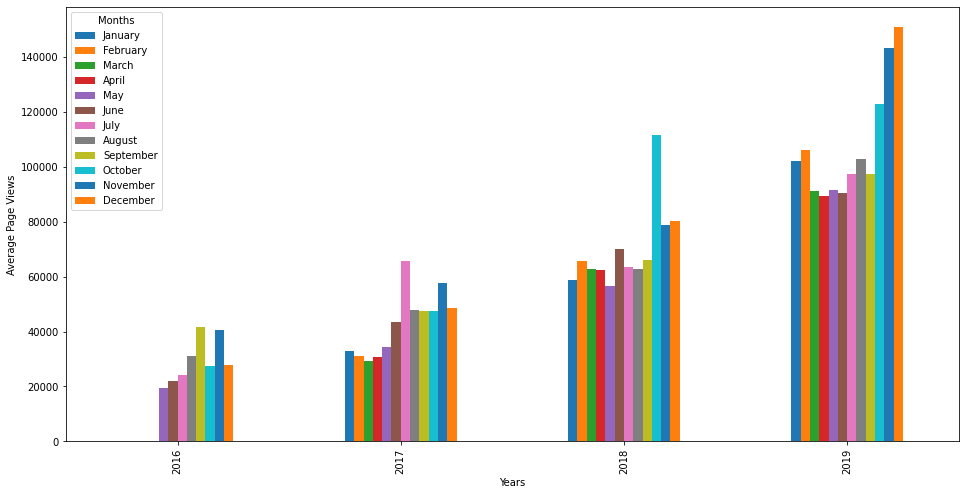

In [16]:
bar_plot_cleaned

### Analyzing Box Plot

Besides overall growth,  
we can observe some regression in the spring season,  
and significant growth at the end of the 2018 and 2019 years.  

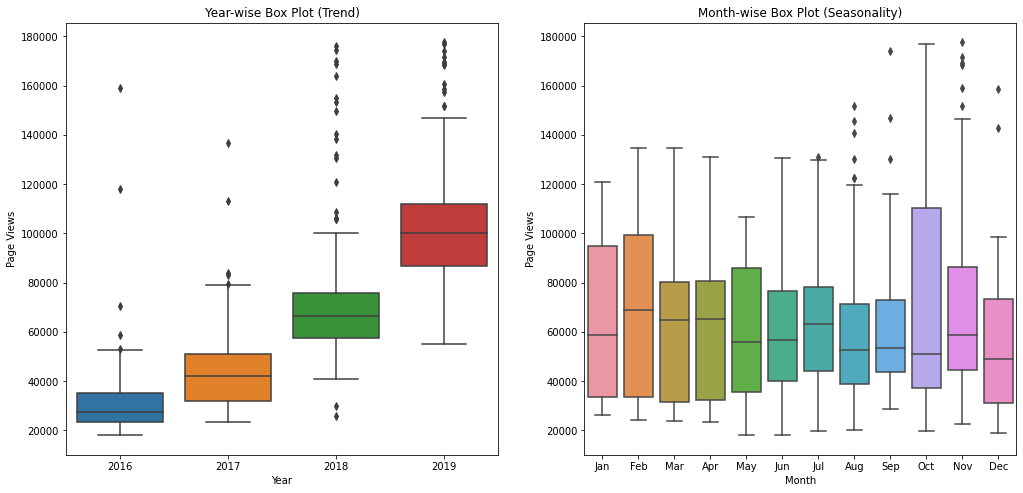

In [17]:
box_plot_cleaned

### Analyzing Trend

We can see exponential growth in each year.  

There is no skew in the data, except the first 2016 year,  
but this can be caused by absence of the data for first four months.  

Outliers mostly present above the maximums in each year.  
In 2018 and 2019 - a lot of outliers.  

### Analyzing Seasonality

The most favorable months are February, March, April and July.  

The less favorable months are May, June, August, September, October and December.  
Since August we can see significant amount of outliers in the upper range.  
